In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("iris.data")

In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [10]:
df.columns=["sepal_length","sepal_width","petal_length","petal_width","species"]

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.shape

(149, 5)

In [19]:
df.duplicated().sum()

3

In [20]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
33,4.9,3.1,1.5,0.1,Iris-setosa
36,4.9,3.1,1.5,0.1,Iris-setosa
141,5.8,2.7,5.1,1.9,Iris-virginica


In [21]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:title={'center':'Spicies Count'}, xlabel='species', ylabel='count'>

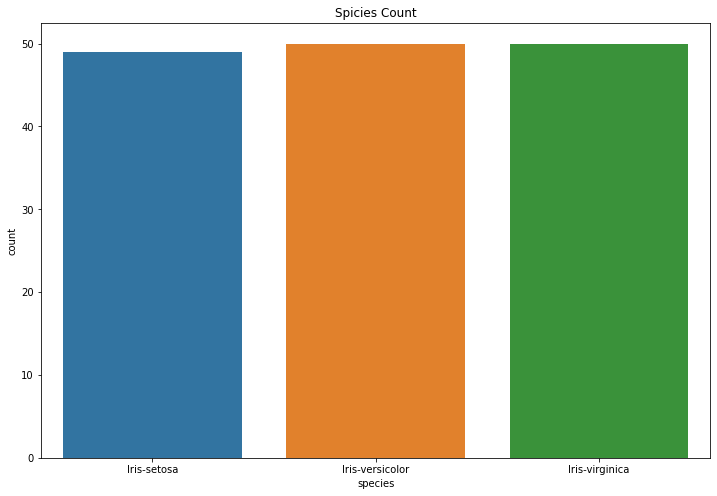

In [24]:
plt.figure(figsize=(12,8))
plt.title("Spicies Count")
sns.countplot(x="species",data=df)

<Figure size 864x576 with 0 Axes>

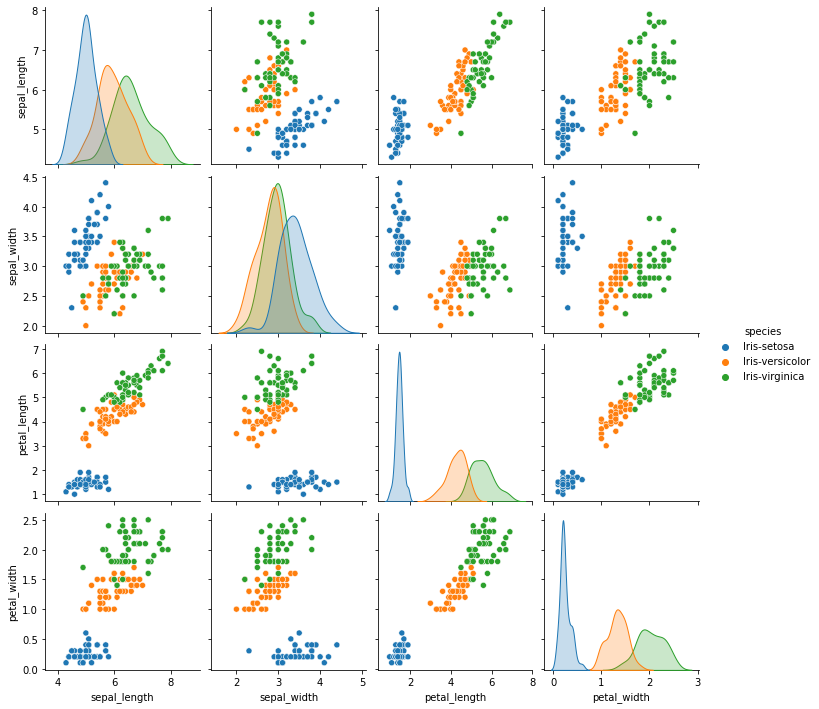

In [25]:
plt.figure(figsize=(12,8))
sns.pairplot(df,hue="species")

<AxesSubplot:>

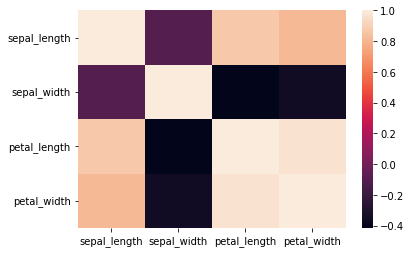

In [26]:
sns.heatmap(df.corr())

In [28]:
df.columns.unique()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

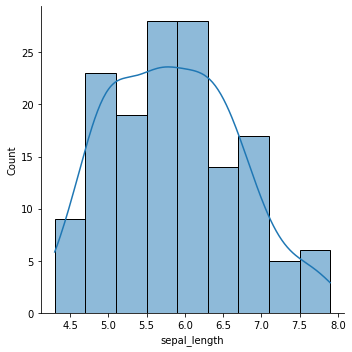

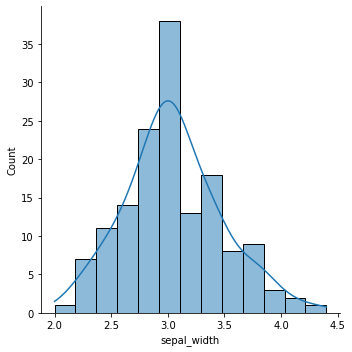

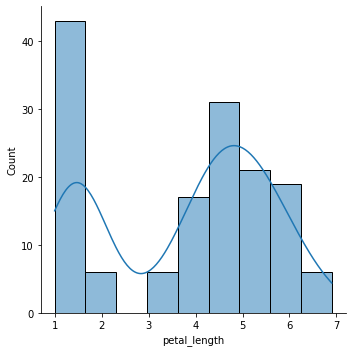

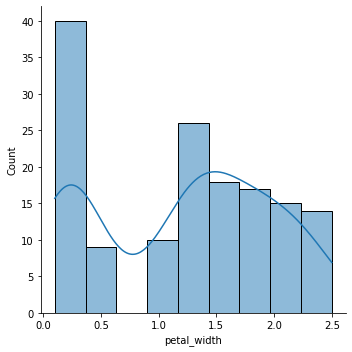

In [29]:
for column_name in df.columns.unique():
    if column_name != "species" :
        sns.displot(df[column_name],kde=True)
    

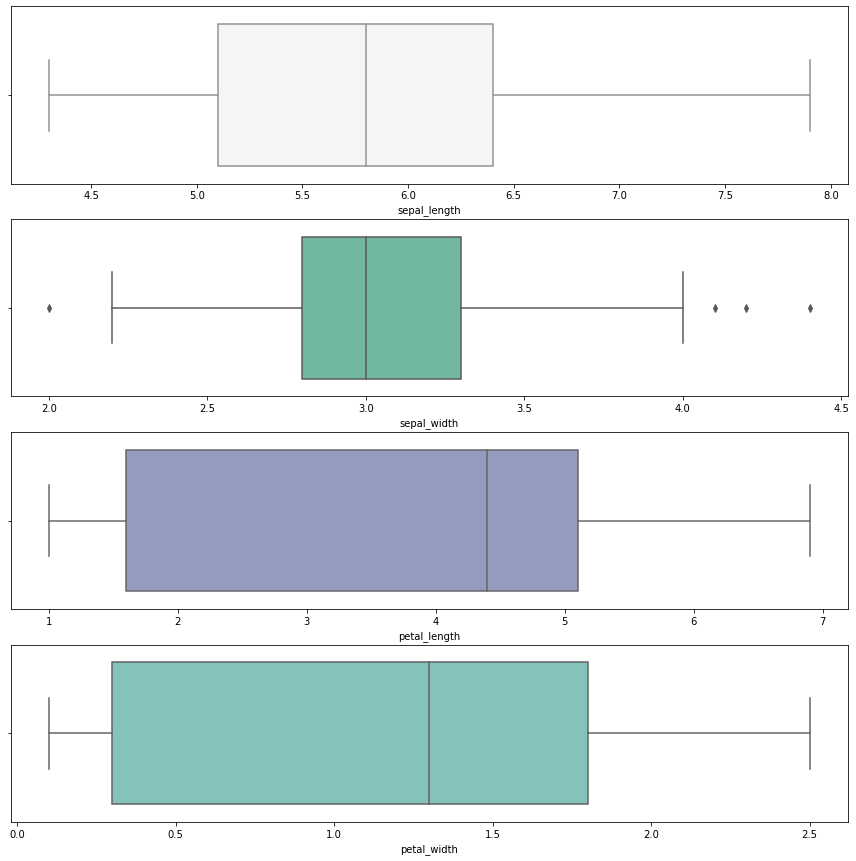

In [31]:
colors = ["BrBG_r","BuGn_r","BuPu_r","GnBu_r"]
i=0
f,axes=plt.subplots(4,figsize=(15,15))
for col,color in zip(df.columns.unique(),colors):
    if col != "species":
        sns.boxplot(x=col,data=df,ax=axes[i],palette=color)
        i = i+1

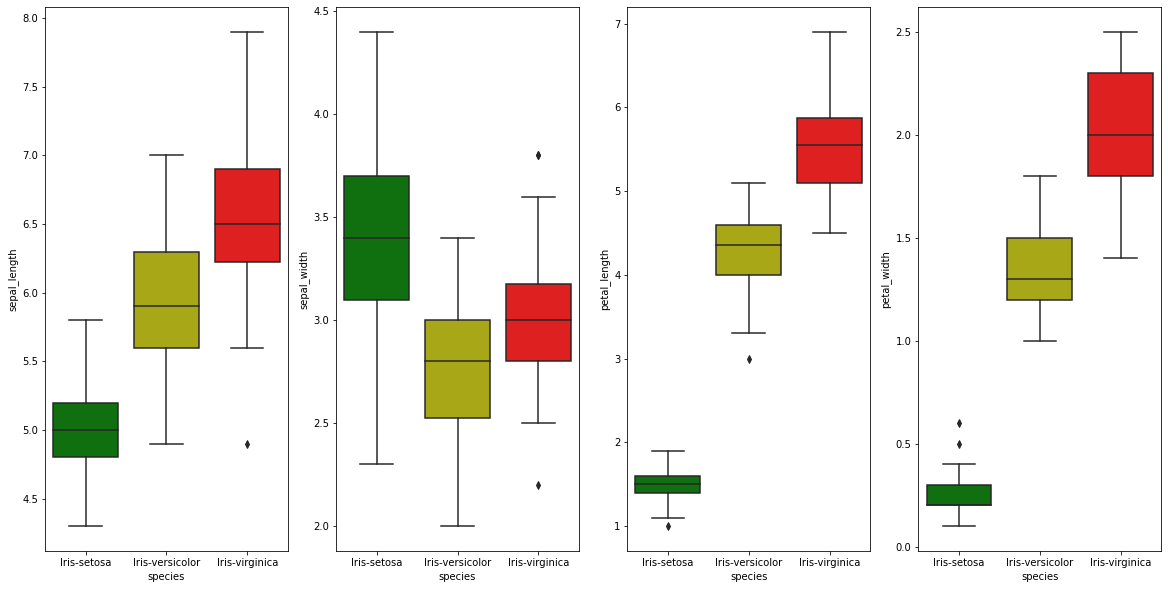

In [41]:
my_pal= {"Iris-versicolor": "y","Iris-setosa":"g","Iris-virginica":"r"}
i=0
f,axes=plt.subplots(1,4,figsize=(20,10))
for col,color in zip(df.columns.unique(),colors):
    if col != "species":
        sns.boxplot(x="species",y=col,data=df,ax=axes[i],palette=my_pal)
        i = i+1

In [43]:
setosa_df=df[df["species"]=="Iris-setosa"]
setosa_df["petal_length"].quantile(0.97)

1.8120000000000003

In [44]:
setosa_df["petal_length"].quantile(0.03)

1.1440000000000001

In [47]:
df[(df["species"]=="Iris_setosa") & (df["petal_length"]>setosa_df["petal_length"].quantile(0.97)) | (df["petal_length"]<setosa_df["petal_length"].quantile(0.03))]

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.3,3.0,1.1,0.1,Iris-setosa
21,4.6,3.6,1.0,0.2,Iris-setosa


In [48]:
df.drop(index=[12,21]).head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [51]:
df.reset_index().head(15)

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,4.9,3.0,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.3,0.2,Iris-setosa
2,2,4.6,3.1,1.5,0.2,Iris-setosa
3,3,5.0,3.6,1.4,0.2,Iris-setosa
4,4,5.4,3.9,1.7,0.4,Iris-setosa
5,5,4.6,3.4,1.4,0.3,Iris-setosa
6,6,5.0,3.4,1.5,0.2,Iris-setosa
7,7,4.4,2.9,1.4,0.2,Iris-setosa
8,8,4.9,3.1,1.5,0.1,Iris-setosa
9,9,5.4,3.7,1.5,0.2,Iris-setosa
